In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [7]:
titanic_data = pd.read_csv('train.csv')

X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [8]:
clf_rf = RandomForestClassifier()

In [9]:
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}

In [10]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [11]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [12]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 10}

Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=15)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

In [14]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                    'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.315988
6,Sex_male,0.230124
4,Fare,0.119895
1,Age,0.101423
0,Pclass,0.081467
2,SibSp,0.054858
3,Parch,0.037273
9,Embarked_S,0.029081
7,Embarked_C,0.016781
8,Embarked_Q,0.013110


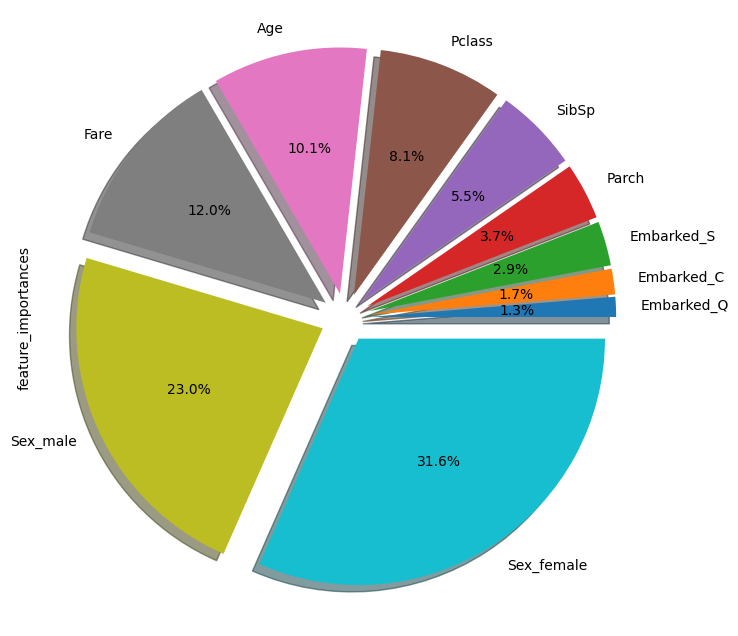

In [15]:
feature_importances_df = pd.DataFrame({'features':list(X_train.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances')

feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));